# CTD data starter code

In [1]:
import gsw  # TEOS-10 Gibbs SeaWater toolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#TODO: generalize path
# WATER_QUALITY_FILE_PATH = './data/EIMContinuousDepthSeriesData_2024Apr08_229519.csv'  # e.g. './data/EIMContinuousDepthSeriesData_2024Apr08_229519.csv'
WATER_QUALITY_FILE_PATH = './data/EIMContinuousDepthSeriesData_2022Apr14_2343.csv'  # e.g. './data/EIMContinuousDepthSeriesData_2024Apr08_229519.csv'
ctd_all_data = pd.read_csv(WATER_QUALITY_FILE_PATH)

In [44]:
ctd_all_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2343 entries, (Timestamp('2000-01-24 21:55:02+0000', tz='UTC'), 0.5) to (Timestamp('2000-11-15 22:26:57+0000', tz='UTC'), 17.0)
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Study_ID                                        2343 non-null   object 
 1   Study_Name                                      2343 non-null   object 
 2   Location_ID                                     2343 non-null   object 
 3   Study_Specific_Location_ID                      2343 non-null   object 
 4   Location_Name                                   2343 non-null   object 
 5   Instrument_ID                                   2343 non-null   object 
 6   Field_Collection_Type                           2343 non-null   object 
 7   Field_Collector                                 2343 non-null   object 
 8   Field_Collecti

Convert the provided datetime string to a Pandas datetime. The data are UTC according to the original DataFrame's `'Time_Zone'` column.  Note the format `'%m/%d/%Y %I:%M:%S %p'` where `%I` is used in place of `'%H'` to indicate 12-hour time and `%p` is AM/PM.  Here is a helpful guide: https://strftime.org/.

In [4]:
ctd_all_data['Field_Collection_Date_Time'] = pd.to_datetime(
    ctd_all_data['Field_Collection_Date_Time'],
    format='%m/%d/%Y %I:%M:%S %p',
    utc=True
)
# index_columns = ['Field_Collection_Date_Time', 'Result_Parameter_Name', 'Depth_Value']  #, 'Result_Parameter_Name']
# index_columns = ['Field_Collection_Date_Time', 'Result_Parameter_Name']
# index_columns = ['Field_Collection_Date_Time']  #, 'Result_Parameter_Name']
index_columns = ['Field_Collection_Date_Time', 'Depth_Value']
ctd_all_data = (ctd_all_data
    .set_index(index_columns)
    .sort_index()
)

In [5]:
# ctd_all_data.pivot(columns=['Result_Parameter_Name'], values=['Result_Value', 'Depth_Value'])

In [9]:
# start_datetime = pd.Timestamp('2016-01-01 00:00:00')
# end_datetime = pd.Timestamp('2017-01-01 00:00:00')
start_datetime = pd.Timestamp('2000-01-01 00:00:00', tz='UTC')
end_datetime = pd.Timestamp('2001-01-01 00:00:00', tz='UTC')
# column_subset = ['Result_Parameter_Name', 'Result_Value', 'Result_Value_Units', 'Depth_Value', 'Depth_Value_Units']
# column_subset = ['Result_Value', 'Result_Value_Units', 'Depth_Value_Units']
# column_subset = ['Result_Value', 'Result_Value_Units', 'Depth_Value', 'Depth_Value_Units']
column_subset = ['Result_Parameter_Name', 'Result_Value']
# column_subset = ['Result_Parameter_Name', 'Result_Value', 'Result_Value_Units', 'Depth_Value_Units']
ctd_subset = ctd_all_data.loc[start_datetime:end_datetime][column_subset]


# ctd_data_2017 = ctd_data[start_datetime:end_datetime]

# ctd_all_data.drop(ctd_all_data.columns.difference(column_subset), axis=1)
# ctd_subset.pivot(columns='Result_Parameter_Name')['Result_Value']

In [17]:
ctd_pivot = ctd_subset.pivot(columns='Result_Parameter_Name', values='Result_Value')

In [ ]:
TODO: create units dict

In [59]:
ctd_all_data.query('Result_Parameter_Name == @parameter')['Result_Value_Units'].unique()

array(['kg/m3-1000'], dtype=object)

Build a dictionary of parameter units for later use.

In [73]:
parameter_units = {}
for parameter in ctd_all_data['Result_Parameter_Name'].unique():
    unit = (ctd_all_data
           .query('Result_Parameter_Name == @parameter')['Result_Value_Units']
           .unique())[0]
    parameter_units[parameter] = unit

parameter_units

{'Density as sigma-t': 'kg/m3-1000',
 'Beam Attenuation': 'm^-1',
 'Dissolved Oxygen': 'mg/L',
 'Dissolved Oxygen Percent Saturation': '%',
 'Salinity': 'PSU',
 'Light Transmission': '%',
 'Temperature, water': 'deg C',
 'pH': 'pH'}

In [13]:
ctd_subset.query('Result_Parameter_Name == "Salinity"') #.pivot(columns='Result_Parameter_Name')['Result_Value']

,Result_Parameter_Name,Result_Value,Result_Value_Units,Depth_Value,Depth_Value_Units
Field_Collection_Date_Time,,,,,
2000-01-24 21:55:02+00:00,Salinity,30.836399,PSU,0.5,m
2000-01-24 21:55:03+00:00,Salinity,30.867701,PSU,1.0,m
2000-01-24 21:55:05+00:00,Salinity,30.904499,PSU,1.5,m
2000-01-24 21:55:07+00:00,Salinity,30.928301,PSU,2.0,m
2000-01-24 21:55:08+00:00,Salinity,30.933300,PSU,2.5,m
...,...,...,...,...,...
2000-11-15 22:26:50+00:00,Salinity,32.258900,PSU,15.0,m
2000-11-15 22:26:52+00:00,Salinity,32.283100,PSU,15.5,m
2000-11-15 22:26:53+00:00,Salinity,32.285801,PSU,16.0,m


In [9]:
ctd_subset.xs('Salinity', level='Result_Parameter_Name')#['Depth_Value_Units'] #.unique()

,Result_Value,Result_Value_Units,Depth_Value,Depth_Value_Units
Field_Collection_Date_Time,,,,
2000-01-24 21:55:02+00:00,30.836399,PSU,0.5,m
2000-01-24 21:55:03+00:00,30.867701,PSU,1.0,m
2000-01-24 21:55:05+00:00,30.904499,PSU,1.5,m
2000-01-24 21:55:07+00:00,30.928301,PSU,2.0,m
2000-01-24 21:55:08+00:00,30.933300,PSU,2.5,m
...,...,...,...,...
2000-11-15 22:26:50+00:00,32.258900,PSU,15.0,m
2000-11-15 22:26:52+00:00,32.283100,PSU,15.5,m
2000-11-15 22:26:53+00:00,32.285801,PSU,16.0,m


In [8]:
ctd_subset.query('Result_Parameter_Name == "Salinity"')

,,Result_Parameter_Name,Result_Value,Result_Value_Units,Depth_Value_Units
Field_Collection_Date_Time,Depth_Value,,,,
2000-01-24 21:55:02+00:00,0.5,Salinity,30.836399,PSU,m
2000-01-24 21:55:03+00:00,1.0,Salinity,30.867701,PSU,m
2000-01-24 21:55:05+00:00,1.5,Salinity,30.904499,PSU,m
2000-01-24 21:55:07+00:00,2.0,Salinity,30.928301,PSU,m
2000-01-24 21:55:08+00:00,2.5,Salinity,30.933300,PSU,m
...,...,...,...,...,...
2000-11-15 22:26:50+00:00,15.0,Salinity,32.258900,PSU,m
2000-11-15 22:26:52+00:00,15.5,Salinity,32.283100,PSU,m
2000-11-15 22:26:53+00:00,16.0,Salinity,32.285801,PSU,m


In [20]:
ctd_pivot['Beam Attenuation'].index.get_level_values('Depth_Value') #.unique()

Index([ 0.5,  1.0,  1.5,  2.0,  2.5,  3.0,  3.5,  4.0,  4.5,  5.0,
       ...
       12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0],
      dtype='float64', name='Depth_Value', length=320)

In [31]:
def plot_depth_profile_by_month(profile, ax=None):
    if ax is None:
        ax = plt.gca()

    # profile_df = df.xs(result_parameter_name, level='Result_Parameter_Name')
    sc = ax.scatter(
        x=profile,
        y=-profile.index.get_level_values('Depth_Value'),
        c=profile.index.get_level_values('Field_Collection_Date_Time').month,
    )
    # ax.set_xlabel(f'{result_parameter_name} [{profile_df['Result_Value_Units'].unique()[0]}]')
    # ax.set_ylabel(f'Depth [{profile_df['Depth_Value_Units'].unique()[0]}]')
    return sc

In [26]:
type(ctd_pivot['Beam Attenuation'])

pandas.core.series.Series

In [37]:
ctd_pivot['Salinity']

Field_Collection_Date_Time  Depth_Value
2000-01-24 21:55:02+00:00   0.5            30.836399
2000-01-24 21:55:03+00:00   1.0            30.867701
2000-01-24 21:55:05+00:00   1.5            30.904499
2000-01-24 21:55:07+00:00   2.0            30.928301
2000-01-24 21:55:08+00:00   2.5            30.933300
                                             ...    
2000-11-15 22:26:50+00:00   15.0           32.258900
2000-11-15 22:26:52+00:00   15.5           32.283100
2000-11-15 22:26:53+00:00   16.0           32.285801
2000-11-15 22:26:55+00:00   16.5           32.285801
2000-11-15 22:26:57+00:00   17.0           32.282700
Name: Salinity, Length: 320, dtype: float64

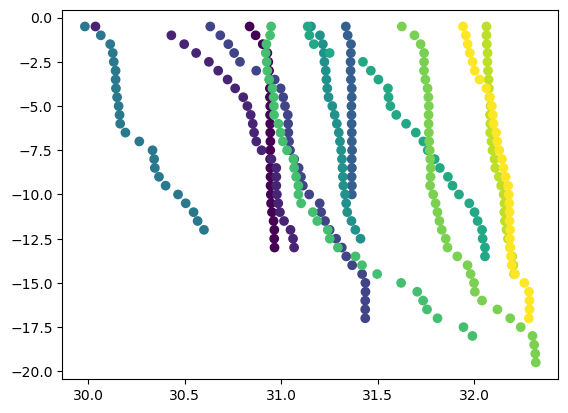

In [36]:
plot_depth_profile_by_month(ctd_pivot['Salinity'])

In [9]:
def plot_depth_profile_by_month(df, result_parameter_name, ax=None):
    if ax is None:
        ax = plt.gca()

    # profile_df = df.xs(result_parameter_name, level='Result_Parameter_Name')
    profile_df = df.query('Result_Parameter_Name == "Salinity"')


    sc = ax.scatter(
        x=profile_df['Result_Value'],
        y=-profile_df['Depth_Value'],
        c=profile_df.index.month,
    )
    ax.set_xlabel(f'{result_parameter_name} [{profile_df['Result_Value_Units'].unique()[0]}]')
    ax.set_ylabel(f'Depth [{profile_df['Depth_Value_Units'].unique()[0]}]')
    return sc

KeyError: 'Depth_Value'

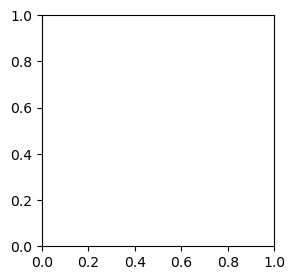

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (3, 3), sharey=True)
plot_depth_profile_by_month(ctd_subset, 'Salinity', ax=ax)

In [14]:
ctd_subset.query('Result_Parameter_Name == "Salinity"')

,Result_Parameter_Name,Result_Value,Result_Value_Units,Depth_Value,Depth_Value_Units
Field_Collection_Date_Time,,,,,
2000-01-24 21:55:02+00:00,Salinity,30.836399,PSU,0.5,m
2000-01-24 21:55:03+00:00,Salinity,30.867701,PSU,1.0,m
2000-01-24 21:55:05+00:00,Salinity,30.904499,PSU,1.5,m
2000-01-24 21:55:07+00:00,Salinity,30.928301,PSU,2.0,m
2000-01-24 21:55:08+00:00,Salinity,30.933300,PSU,2.5,m
...,...,...,...,...,...
2000-11-15 22:26:50+00:00,Salinity,32.258900,PSU,15.0,m
2000-11-15 22:26:52+00:00,Salinity,32.283100,PSU,15.5,m
2000-11-15 22:26:53+00:00,Salinity,32.285801,PSU,16.0,m


In [42]:
# ctd_subset.xs('Salinity', level='Result_Parameter_Name')

# ctd_subset['absolute_salinity'] = gsw.SA_from_SP(SP=ctd_subset.query('Result_Parameter_Name == "Salinity"')['Result_Value'],p=0,lon=-123.113315156629,lat=48.1733055593837)
# absolute_salinity = gsw.SA_from_SP(SP=ctd_subset.query('Result_Parameter_Name == "Salinity"')['Result_Value'],p=0,lon=-123.113315156629,lat=48.1733055593837)
ctd_pivot['absolute_salinity'] = gsw.SA_from_SP(SP=ctd_pivot["Salinity"],p=0,lon=-123.113315156629,lat=48.1733055593837)

In [43]:
ctd_pivot

,Result_Parameter_Name,Beam Attenuation,Density as sigma-t,Dissolved Oxygen,Dissolved Oxygen Percent Saturation,Light Transmission,Salinity,"Temperature, water",pH,absolute_salinity
Field_Collection_Date_Time,Depth_Value,,,,,,,,,
2000-01-24 21:55:02+00:00,0.5,1.027878,24.059799,7.242061,74.069603,77.339188,30.836399,7.6094,NaN,30.985639
2000-01-24 21:55:03+00:00,1.0,1.033876,24.084801,7.102087,72.648201,77.223297,30.867701,7.6066,NaN,31.017092
2000-01-24 21:55:05+00:00,1.5,1.044897,24.114000,7.183269,73.491943,77.010826,30.904499,7.6040,NaN,31.054069
2000-01-24 21:55:07+00:00,2.0,1.054942,24.132700,7.319346,74.895470,76.817665,30.928301,7.6038,NaN,31.077986
2000-01-24 21:55:08+00:00,2.5,1.055948,24.136600,7.395378,75.676460,76.798347,30.933300,7.6041,NaN,31.083009
...,...,...,...,...,...,...,...,...,...,...
2000-11-15 22:26:50+00:00,15.0,0.802789,25.035400,4.696825,49.568367,81.816017,32.258900,8.5863,NaN,32.415024
2000-11-15 22:26:52+00:00,15.5,0.844343,25.055700,4.689205,49.485977,80.970467,32.283100,8.5775,NaN,32.439342
2000-11-15 22:26:53+00:00,16.0,0.864328,25.057899,4.693683,49.533989,80.566917,32.285801,8.5774,NaN,32.442056


In [12]:
absolute_salinity

Field_Collection_Date_Time  Result_Parameter_Name
2000-01-24 21:55:02+00:00   Salinity                 30.985639
2000-01-24 21:55:03+00:00   Salinity                 31.017092
2000-01-24 21:55:05+00:00   Salinity                 31.054069
2000-01-24 21:55:07+00:00   Salinity                 31.077986
2000-01-24 21:55:08+00:00   Salinity                 31.083009
                                                       ...    
2000-11-15 22:26:50+00:00   Salinity                 32.415024
2000-11-15 22:26:52+00:00   Salinity                 32.439342
2000-11-15 22:26:53+00:00   Salinity                 32.442056
2000-11-15 22:26:55+00:00   Salinity                 32.442056
2000-11-15 22:26:57+00:00   Salinity                 32.438940
Name: Result_Value, Length: 320, dtype: float64

In [15]:
ctd_subset.pivot(columns='Result_Parameter_Name')['Result_Value']['']


,Result_Parameter_Name,Beam Attenuation,Density as sigma-t,Dissolved Oxygen,Dissolved Oxygen Percent Saturation,Light Transmission,Salinity,"Temperature, water",pH
Field_Collection_Date_Time,Depth_Value,,,,,,,,
2000-01-24 21:55:02+00:00,0.5,1.027878,24.059799,7.242061,74.069603,77.339188,30.836399,7.6094,NaN
2000-01-24 21:55:03+00:00,1.0,1.033876,24.084801,7.102087,72.648201,77.223297,30.867701,7.6066,NaN
2000-01-24 21:55:05+00:00,1.5,1.044897,24.114000,7.183269,73.491943,77.010826,30.904499,7.6040,NaN
2000-01-24 21:55:07+00:00,2.0,1.054942,24.132700,7.319346,74.895470,76.817665,30.928301,7.6038,NaN
2000-01-24 21:55:08+00:00,2.5,1.055948,24.136600,7.395378,75.676460,76.798347,30.933300,7.6041,NaN
...,...,...,...,...,...,...,...,...,...
2000-11-15 22:26:50+00:00,15.0,0.802789,25.035400,4.696825,49.568367,81.816017,32.258900,8.5863,NaN
2000-11-15 22:26:52+00:00,15.5,0.844343,25.055700,4.689205,49.485977,80.970467,32.283100,8.5775,NaN
2000-11-15 22:26:53+00:00,16.0,0.864328,25.057899,4.693683,49.533989,80.566917,32.285801,8.5774,NaN


In [13]:
ctd_subset.loc[:, ['absolute_salinity']] = absolute_salinity

In [14]:
ctd_subset

Result_Parameter_Name  \
Field_Collection_Date_Time Depth_Value                                        
2000-01-24 21:55:02+00:00  0.5                           Density as sigma-t   
                           0.5                             Beam Attenuation   
                           0.5                             Dissolved Oxygen   
                           0.5          Dissolved Oxygen Percent Saturation   
                           0.5                                     Salinity   
...                                                                     ...   
2000-11-15 22:26:57+00:00  17.0                            Dissolved Oxygen   
                           17.0         Dissolved Oxygen Percent Saturation   
                           17.0                                    Salinity   
                           17.0                          Light Transmission   
                           17.0                          Temperature, water   

                                        Result_Value Result_Value_Units  \
Field_Collection_Date_Time Depth_Value                                    
2000-01-24 21:55:02+00:00  0.5             24.059799         kg/m3-1000   
                           0.5              1.027878               m^-1   
                           0.5              7.242061               mg/L   
                           0.5             74.069603                  %   
                           0.5             30.836399                PSU   
...                                              ...                ...   
2000-11-15 22:26:57+00:00  17.0             4.658565               mg/L   
                           17.0            49.165020                  %   
                           17.0            32.282700                PSU   
                           17.0            80.028839                  %   
                           17.0             8.579800              deg C   

                                       Depth_Value_Units  absolute_salinity  
Field_Collection_Date_Time Depth_Value                                       
2000-01-24 21:55:02+00:00  0.5                         m          30.985639  
                           0.5                         m          30.985639  
                           0.5                         m          30.985639  
                           0.5                         m          30.985639  
                           0.5                         m          30.985639  
...                                                  ...                ...  
2000-11-15 22:26:57+00:00  17.0                        m          32.438940  
                           17.0                        m          32.438940  
                           17.0                        m          32.438940  
                           17.0                        m          32.438940  
                           17.0                        m          32.438940  

[2343 rows x 5 columns]

In [20]:
ctd_subset.index.get_level_values('Result_Parameter_Name').unique()

Index(['Beam Attenuation', 'Density as sigma-t', 'Dissolved Oxygen',
       'Dissolved Oxygen Percent Saturation', 'Light Transmission', 'Salinity',
       'Temperature, water', 'pH'],
      dtype='object', name='Result_Parameter_Name')

In [13]:
ctd_subset

Result_Value  \
Field_Collection_Date_Time Result_Parameter_Name                               
2000-01-24 21:55:02+00:00  Beam Attenuation                         1.027878   
                           Density as sigma-t                      24.059799   
                           Dissolved Oxygen                         7.242061   
                           Dissolved Oxygen Percent Saturation     74.069603   
                           Light Transmission                      77.339188   
...                                                                      ...   
2000-11-15 22:26:57+00:00  Dissolved Oxygen                         4.658565   
                           Dissolved Oxygen Percent Saturation     49.165020   
                           Light Transmission                      80.028839   
                           Salinity                                32.282700   
                           Temperature, water                       8.579800   

                                                               Result_Value_Units  \
Field_Collection_Date_Time Result_Parameter_Name                                    
2000-01-24 21:55:02+00:00  Beam Attenuation                                  m^-1   
                           Density as sigma-t                          kg/m3-1000   
                           Dissolved Oxygen                                  mg/L   
                           Dissolved Oxygen Percent Saturation                  %   
                           Light Transmission                                   %   
...                                                                           ...   
2000-11-15 22:26:57+00:00  Dissolved Oxygen                                  mg/L   
                           Dissolved Oxygen Percent Saturation                  %   
                           Light Transmission                                   %   
                           Salinity                                           PSU   
                           Temperature, water                               deg C   

                                                                Depth_Value  \
Field_Collection_Date_Time Result_Parameter_Name                              
2000-01-24 21:55:02+00:00  Beam Attenuation                             0.5   
                           Density as sigma-t                           0.5   
                           Dissolved Oxygen                             0.5   
                           Dissolved Oxygen Percent Saturation          0.5   
                           Light Transmission                           0.5   
...                                                                     ...   
2000-11-15 22:26:57+00:00  Dissolved Oxygen                            17.0   
                           Dissolved Oxygen Percent Saturation         17.0   
                           Light Transmission                          17.0   
                           Salinity                                    17.0   
                           Temperature, water                          17.0   

                                                               Depth_Value_Units  \
Field_Collection_Date_Time Result_Parameter_Name                                   
2000-01-24 21:55:02+00:00  Beam Attenuation                                    m   
                           Density as sigma-t                                  m   
                           Dissolved Oxygen                                    m   
                           Dissolved Oxygen Percent Saturation                 m   
                           Light Transmission                                  m   
...                                                                          ...   
2000-11-15 22:26:57+00:00  Dissolved Oxygen                                    m   
                           Dissolved Oxygen Percent Saturation                 m   
                           Light Transmission    

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5k/tj9m5nbs0rb__4sp5qh876yc0000gn/T/ipykernel_17428/3286040515.py:11: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel('Density as $\sigma T$ (kg/m$^3$-1000)')


Text(0, 0.5, 'Depth (m)')

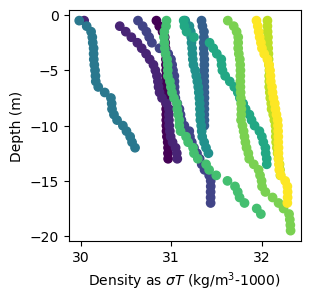

In [34]:
#%% plot depth profiles
fig,ax = plt.subplots(1, 1, figsize =(3,3), sharey=True) #
# fig.subplots_adjust(wspace=0.1)
# fig.subplots_adjust(hspace=0.35)
# s1 = sns.scatterplot(x=DensitySigT['Result_Value'],y=DensitySigT['Depth_Value'],c=pd.to_datetime(DensitySigT['Field_Collection_Date']),ax=ax[0,0])
s1 = ax.scatter(
    ctd_subset.xs('Salinity', level='Result_Parameter_Name')['Result_Value'],
    -ctd_subset.xs('Salinity', level='Result_Parameter_Name')['Depth_Value'],
    c=ctd_subset.xs('Salinity', level='Result_Parameter_Name').index.month,
)
ax.set_xlabel('Density as $\sigma T$ (kg/m$^3$-1000)')
ax.set_ylabel('Depth (m)')
# cbar = plt.colorbar(s1,orientation="vertical",location="left",ax=ax[2,1])
# cbar.set_label("month", labelpad=-50)

# sns.scatterplot(x=BeamAttenuation['Result_Value'],y=-BeamAttenuation['Depth_Value'],c=pd.to_datetime(BeamAttenuation['Field_Collection_Date']),ax=ax[0,1])
# ax[0,1].set_xlabel('Beam Attenuation ($m^{-1}$)')
# sns.scatterplot(x=DissolvedOxygen['Result_Value'],y=-DissolvedOxygen['Depth_Value'],c=pd.to_datetime(DissolvedOxygen['Field_Collection_Date']),ax=ax[0,2])
# ax[0,2].set_xlabel('Dissolved Oxygen (mg/L)')
# sns.scatterplot(x=DissolvedOxygenPercentSaturation['Result_Value'],y=-DissolvedOxygenPercentSaturation['Depth_Value'],c=pd.to_datetime(DissolvedOxygenPercentSaturation['Field_Collection_Date']),ax=ax[1,0])
# ax[1,0].set_xlabel('Dissolved Oxygen % Saturation (%)')
# ax[1,0].set_ylabel('Depth (m)')
# sns.scatterplot(x=Salinity['Result_Value'],y=-Salinity['Depth_Value'],c=pd.to_datetime(Salinity['Field_Collection_Date']),ax=ax[1,1])
# ax[1,1].set_xlabel('Salinity (PSU)')
# sns.scatterplot(x=LightTransmission['Result_Value'],y=-LightTransmission['Depth_Value'],c=pd.to_datetime(LightTransmission['Field_Collection_Date']),ax=ax[1,2])
# ax[1,2].set_xlabel('Light Transmission (%)')
# sns.scatterplot(x=WaterTemperature['Result_Value'],y=-WaterTemperature['Depth_Value'],c=pd.to_datetime(WaterTemperature['Field_Collection_Date']),ax=ax[2,0])
# ax[2,0].set_xlabel('Water Temperature (C)')
# ax[2,0].set_ylabel('Depth (m)')

# ax[2,1].set_visible(False)
# ax[2,2].set_visible(False)

In [15]:
# ctd_all_data['Field_Collection_Time'] = ctd_all_data['Field_Collection_Time'].apply(split_HMS_and_ms)
# ctd_all_data['datetime'] = pd.to_datetime(
#     ctd_all_data[['Field_Collection_Date', 'Field_Collection_Time']].agg('-'.join, axis=1),
#     format='%m/%d/%Y-%H:%M:%S',
#     errors='coerce',
# )
# ctd_data = ctd_data.set_index(['datetime', 'Result_Parameter_Name']).sort_index()

In [9]:
start_datetime = pd.Timestamp('2016-01-01 00:00:00')
end_datetime = pd.Timestamp('2017-01-01 00:00:00')
ctd_data_2017 = ctd_data[start_datetime:end_datetime]

In [25]:
ctd_data_2017.index.get_level_values(level='Result_Parameter_Name').unique()

Index(['Beam Attenuation', 'Conductivity', 'Density as sigma-t',
       'Dissolved Oxygen', 'Dissolved Oxygen Percent Saturation',
       'Fluorescence', 'Light Transmission',
       'Photosynthetically active radiation', 'Pressure', 'Salinity',
       'Temperature, water'],
      dtype='object', name='Result_Parameter_Name')

In [29]:
ctd_data_2017

Study_ID  \
datetime            Result_Parameter_Name                              
2016-01-15 21:27:01 Beam Attenuation                     MarineWater   
                    Conductivity                         MarineWater   
                    Density as sigma-t                   MarineWater   
                    Dissolved Oxygen                     MarineWater   
                    Dissolved Oxygen Percent Saturation  MarineWater   
...                                                              ...   
2016-11-21 21:22:01 Fluorescence                         MarineWater   
                    Light Transmission                   MarineWater   
                    Pressure                             MarineWater   
                    Salinity                             MarineWater   
                    Temperature, water                   MarineWater   

                                                                                                Study_Name  \
datetime            Result_Parameter_Name                                                                    
2016-01-15 21:27:01 Beam Attenuation                     Long-term marine water column monitoring 1999-...   
                    Conductivity                         Long-term marine water column monitoring 1999-...   
                    Density as sigma-t                   Long-term marine water column monitoring 1999-...   
                    Dissolved Oxygen                     Long-term marine water column monitoring 1999-...   
                    Dissolved Oxygen Percent Saturation  Long-term marine water column monitoring 1999-...   
...                                                                                                    ...   
2016-11-21 21:22:01 Fluorescence                         Long-term marine water column monitoring 1999-...   
                    Light Transmission                   Long-term marine water column monitoring 1999-...   
                    Pressure                             Long-term marine water column monitoring 1999-...   
                    Salinity                             Long-term marine water column monitoring 1999-...   
                    Temperature, water                   Long-term marine water column monitoring 1999-...   

                                                        Location_ID  \
datetime            Result_Parameter_Name                             
2016-01-15 21:27:01 Beam Attenuation                         ADM002   
                    Conductivity                             ADM002   
                    Density as sigma-t                       ADM002   
                    Dissolved Oxygen                         ADM002   
                    Dissolved Oxygen Percent Saturation      ADM002   
...                                                             ...   
2016-11-21 21:22:01 Fluorescence                             ADM002   
                    Light Transmission                       ADM002   
                    Pressure                                 ADM002   
                    Salinity                                 ADM002   
                    Temperature, water                       ADM002   

                                                        Study_Specific_Location_ID  \
datetime            Result_Parameter_Name                                            
2016-01-15 21:27:01 Beam Attenuation                                        ADM002   
                    Conductivity                                            ADM002   
                    Density as sigma-t                                      ADM002   
                    Dissolved Oxygen                                        ADM002   
                    Dissolved Oxygen Percent Saturation                     ADM002   
...                                                                            ...   
2016-11-21 21:22:01 Fluorescence                                            ADM0

In [28]:
ctd_data_2017.loc['Salinity']  #.info()

KeyError: 'Salinity'

In [19]:
ctd_data_2017.reset_index(level=1).pivot(columns='Result_Parameter_Name', values=['Result_Value', 'Depth_Value'])

Result_Value                                  \
Result_Parameter_Name Beam Attenuation Conductivity Density as sigma-t   
datetime                                                                 
2016-01-15 21:27:01             0.8295     3.281379            23.7703   
2016-01-15 21:27:02             0.8337     3.281394            23.7707   
2016-01-15 21:27:03             0.8584     3.281416            23.7704   
2016-01-15 21:27:04             0.8957     3.281582            23.7709   
2016-01-15 21:27:06             0.8965     3.281682            23.7714   
...                                ...          ...                ...   
2016-11-21 21:21:56             0.6072     3.467126            24.0338   
2016-11-21 21:21:58             0.6067     3.467148            24.0338   
2016-11-21 21:21:59             0.6078     3.467160            24.0336   
2016-11-21 21:22:00             0.6031     3.467175            24.0335   
2016-11-21 21:22:01             0.5894     3.467138            24.0325   

                                                                            \
Result_Parameter_Name Dissolved Oxygen Dissolved Oxygen Percent Saturation   
datetime                                                                     
2016-01-15 21:27:01           7.585357                           79.586010   
2016-01-15 21:27:02           7.651867                           80.282160   
2016-01-15 21:27:03           7.662148                           80.391402   
2016-01-15 21:27:04           7.668360                           80.458875   
2016-01-15 21:27:06           7.685389                           80.636661   
...                                ...                                 ...   
2016-11-21 21:21:56           6.794317                           73.870083   
2016-11-21 21:21:58           6.806526                           74.001816   
2016-11-21 21:21:59           6.803849                           73.972899   
2016-11-21 21:22:00           6.782964                           73.745847   
2016-11-21 21:22:01           6.787677                           73.798326   

                                                       \
Result_Parameter_Name Fluorescence Light Transmission   
datetime                                                
2016-01-15 21:27:01       1.060930            81.2725   
2016-01-15 21:27:02       1.023532            81.1862   
2016-01-15 21:27:03       1.047152            80.6863   
2016-01-15 21:27:04       1.047152            79.9380   
2016-01-15 21:27:06       1.039278            79.9214   
...                            ...                ...   
2016-11-21 21:21:56       0.834559            85.9156   
2016-11-21 21:21:58       0.838496            85.9263   
2016-11-21 21:21:59       0.868020            85.9039   
2016-11-21 21:22:00       0.881798            86.0034   
2016-11-21 21:22:01       0.832591            86.2993   

                                                                             \
Result_Parameter_Name Photosynthetically active radiation Pressure Salinity   
datetime                                                                      
2016-01-15 21:27:01                                24.818    3.025  30.6807   
2016-01-15 21:27:02                                20.286    3.530  30.6811   
2016-01-15 21:27:03                                17.151    4.034  30.6808   
2016-01-15 21:27:04                                14.345    4.538  30.6816   
2016-01-15 21:27:06                                12.162    5.043  30.6822   
...                                                   ...      ...      ...   
2016-11-21 21:21:56                                   NaN   78.679  31.3059   
2016-11-21 21:21:58                                   NaN   79.183  31.3059   
2016-11-21 21:21:59                                   NaN   79.688  31.3056   
2016-11-21 21:22:00                                   NaN   80.192  31.3055   
2016-11-21 21:22:01                                   NaN   80.697  31

In [25]:
# DataFrame.pivot(*, columns, index=_NoDefault.no_default, values=_NoDefault.no_default)
# ctd_data.pivot(columns='Result_Parameter_Name', values=['Result_Value', 'Result_Value_Units']) #, index=_NoDefault.no_default, values=_NoDefault.no_default)

Result_Value                                      \
Result_Parameter_Name Beam Attenuation Density as sigma-t Dissolved Oxygen   
0                                  NaN          24.059799              NaN   
1                             1.027878                NaN              NaN   
2                                  NaN                NaN         7.242061   
3                                  NaN                NaN              NaN   
4                                  NaN                NaN              NaN   
...                                ...                ...              ...   
2338                               NaN                NaN         4.658565   
2339                               NaN                NaN              NaN   
2340                               NaN                NaN              NaN   
2341                               NaN                NaN              NaN   
2342                               NaN                NaN              NaN   

                                                                              \
Result_Parameter_Name Dissolved Oxygen Percent Saturation Light Transmission   
0                                                     NaN                NaN   
1                                                     NaN                NaN   
2                                                     NaN                NaN   
3                                               74.069603                NaN   
4                                                     NaN                NaN   
...                                                   ...                ...   
2338                                                  NaN                NaN   
2339                                             49.16502                NaN   
2340                                                  NaN                NaN   
2341                                                  NaN          80.028839   
2342                                                  NaN                NaN   

                                                         Result_Value_Units  \
Result_Parameter_Name   Salinity Temperature, water   pH   Beam Attenuation   
0                            NaN                NaN  NaN                NaN   
1                            NaN                NaN  NaN               m^-1   
2                            NaN                NaN  NaN                NaN   
3                            NaN                NaN  NaN                NaN   
4                      30.836399                NaN  NaN                NaN   
...                          ...                ...  ...                ...   
2338                         NaN                NaN  NaN                NaN   
2339                         NaN                NaN  NaN                NaN   
2340                     32.2827                NaN  NaN                NaN   
2341                         NaN                NaN  NaN                NaN   
2342                         NaN             8.5798  NaN                NaN   

                                                           \
Result_Parameter_Name Density as sigma-t Dissolved Oxygen   
0                             kg/m3-1000              NaN   
1                                    NaN              NaN   
2                                    NaN             mg/L   
3                                    NaN              NaN   
4                                    NaN              NaN   
...                                  ...              ...   
2338                                 NaN             mg/L   
2339                                 NaN              NaN   
2340                                 NaN              NaN   
2341                                 NaN              NaN   
2342                                 NaN              NaN   

                                                                              \
Result_Parameter_Name Dissolved Oxygen Percent Saturation Light Tran

In [35]:
ctd_data[['Field_Collection_Date', 'Field_Collection_Time']].agg('-'.join, axis=1)

0       01/24/2000-21:55:02
1       01/24/2000-21:55:02
2       01/24/2000-21:55:02
3       01/24/2000-21:55:02
4       01/24/2000-21:55:02
               ...         
2338    11/15/2000-22:26:57
2339    11/15/2000-22:26:57
2340    11/15/2000-22:26:57
2341    11/15/2000-22:26:57
2342    11/15/2000-22:26:57
Length: 2343, dtype: object

In [40]:
ctd_data

,Study_ID,Study_Name,Location_ID,Study_Specific_Location_ID,Location_Name,Instrument_ID,Field_Collection_Type,Field_Collector,Field_Collection_Date,Field_Collection_Time,...,Result_Data_Review_Status,Time_Zone,Calculated_Latitude_Decimal_Degrees_NAD83HARN,Calculated_Longitude_Decimal_Degrees_NAD83HARN,Calculated_Land_Surface_Elevation_NAVD88_FT,Continuous_Result_Suspect_or_Rejected_Flag,Continuous_Result_Suspect_Code,Continuous_Result_Suspect_Description,Record_Created_On,Continuous_Result_System_ID
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-24 21:55:02,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 19,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142454109
2000-01-24 21:55:02,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,Sea Tech,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142545284
2000-01-24 21:55:02,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142636366
2000-01-24 21:55:02,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142727307
2000-01-24 21:55:02,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 19,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142846120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-11-15 22:26:57,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,11/15/2000,22:26:57,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142664884
2000-11-15 22:26:57,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,11/15/2000,22:26:57,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142755825
2000-11-15 22:26:57,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 19,Measurement,WA Dept of Ecology,11/15/2000,22:26:57,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142874652


In [31]:
pd.to_datetime(ctd_data[['Field_Collection_Date', 'Field_Collection_Time']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [16]:
pd to datetime .... ctd_data['Field_Collection_Date'] + ctd_data['Field_Collection_Time']

0       01/24/2000
1       01/24/2000
2       01/24/2000
3       01/24/2000
4       01/24/2000
           ...    
2338    11/15/2000
2339    11/15/2000
2340    11/15/2000
2341    11/15/2000
2342    11/15/2000
Name: Field_Collection_Date, Length: 2343, dtype: object

In [15]:
ctd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Study_ID                                        2343 non-null   object 
 1   Study_Name                                      2343 non-null   object 
 2   Location_ID                                     2343 non-null   object 
 3   Study_Specific_Location_ID                      2343 non-null   object 
 4   Location_Name                                   2343 non-null   object 
 5   Instrument_ID                                   2343 non-null   object 
 6   Field_Collection_Type                           2343 non-null   object 
 7   Field_Collector                                 2343 non-null   object 
 8   Field_Collection_Date                           2343 non-null   object 
 9   Field_Collection_Time                    

In [12]:
ctd_data

,Study_ID,Study_Name,Location_ID,Study_Specific_Location_ID,Location_Name,Instrument_ID,Field_Collection_Type,Field_Collector,Field_Collection_Date,Field_Collection_Time,...,Result_Data_Review_Status,Time_Zone,Calculated_Latitude_Decimal_Degrees_NAD83HARN,Calculated_Longitude_Decimal_Degrees_NAD83HARN,Calculated_Land_Surface_Elevation_NAVD88_FT,Continuous_Result_Suspect_or_Rejected_Flag,Continuous_Result_Suspect_Code,Continuous_Result_Suspect_Description,Record_Created_On,Continuous_Result_System_ID
0,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 19,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142454109
1,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,Sea Tech,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142545284
2,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142636366
3,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142727307
4,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 19,Measurement,WA Dept of Ecology,01/24/2000,21:55:02,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142846120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,11/15/2000,22:26:57,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142664884
2339,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 22,Measurement,WA Dept of Ecology,11/15/2000,22:26:57,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142755825
2340,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,SBE 19,Measurement,WA Dept of Ecology,11/15/2000,22:26:57,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142874652
2341,MarineWater,Long-term marine water column monitoring 1999-...,DUN001,DUN001,DUN001,Sea Tech,Measurement,WA Dept of Ecology,11/15/2000,22:26:57,...,Final,UTC - Coordinated Universal Time,48.173306,-123.113315,NaN,NaN,NaN,NaN,6/4/2019 8:01:32 PM,142965738


In [11]:
ctd_data.set_index('Instrument_ID')['Result_Parameter_Name']

Instrument_ID
SBE 19                       Density as sigma-t
Sea Tech                       Beam Attenuation
SBE 22                         Dissolved Oxygen
SBE 22      Dissolved Oxygen Percent Saturation
SBE 19                                 Salinity
                           ...                 
SBE 22                         Dissolved Oxygen
SBE 22      Dissolved Oxygen Percent Saturation
SBE 19                                 Salinity
Sea Tech                     Light Transmission
SBE 19                       Temperature, water
Name: Result_Parameter_Name, Length: 2343, dtype: object

In [ ]:
TODO: need to melt dataframe

In [ ]:
df.pivot(index='foo', columns='bar', values='baz')
